In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Для начала считаем данные о котировке двух инструментов из csv-файла, полученного при импорте с сайта биржи в объект Pandas DataFrame:

In [3]:
mvid = pd.read_csv('Data/MVID_101001_171001.txt')
sber = pd.read_csv('Data/SBER_101001_171001.txt')

In [4]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [5]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [7]:
rez = mvid.merge(sber, on="<DATE>")
rez.shape

(1758, 11)

In [9]:
rez.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,MVID,D,20101001,0,194.38,19406,SBER,D,0,89.09,332429890
1,MVID,D,20101004,0,190.00,31039,SBER,D,0,89.88,194032721
2,MVID,D,20101005,0,187.00,17651,SBER,D,0,91.97,198775753
3,MVID,D,20101006,0,190.04,36482,SBER,D,0,91.20,210406027
4,MVID,D,20101007,0,199.85,204248,SBER,D,0,90.40,145137617


In [11]:
x = data["<CLOSE>_x"]
y = data["<CLOSE>_y"]

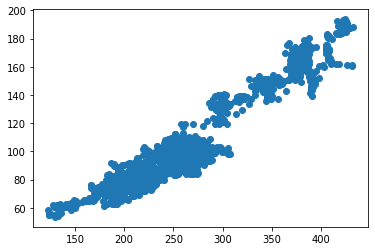

In [12]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [14]:
class hypothesis:
    
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def BGD_new(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps = 5000):
        """Метод градиентного спуска"""
        steps, errors = [], []
        dJ = 1
        step = 0
        old= self.error(X, Y)
        new = self.error(X, Y) - 1
        
        
        while dJ > accuracy and (step < max_steps):
            
            dJ0 = sum(self.predict(X)-Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
             
            old = new
            new = self.error(X, Y)
            
            dJ = abs(old - new)
            
            step += 1
            steps.append(step)
            errors.append(new)
            
        return steps, errors
        
    def predict(self, x):
        """Метод для предсказания результата по фактору"""
        return self.b0 + self.b1 * x

    def error(self, X, Y):  
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
        
    

In [16]:
model = hypothesis()
steps, errors = model.BGD_new(x, y)
model.predict(x)

0        77.150310
1        75.411898
2        74.221206
3        75.427774
4        79.321339
           ...    
1753    168.682826
1754    168.325618
1755    167.928720
1756    165.150437
1757    167.690582
Name: <CLOSE>_x, Length: 1758, dtype: float64

3. Оценить на графике качество построенной модели.

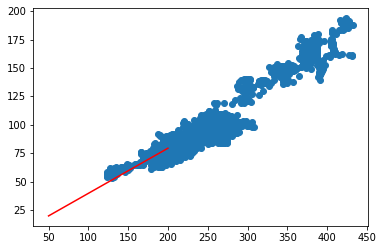

In [17]:
X0 = np.linspace(50, 200, 100)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, "r")
plt.show()

In [19]:
print(f"{model.error(x, y)}")

47.53642287489196


4. Построить кривые обучения.

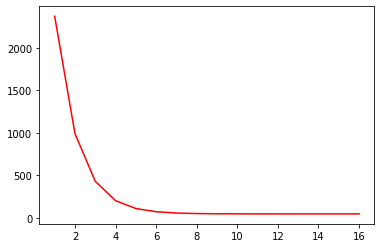

In [20]:
plt.figure()
plt.plot(steps, errors, "r")
plt.show()